# 10 符號式的數學運算 Sympy

## 10-1 先來我們標準資料讀入

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
1/2 + 1/3

0.8333333333333333

可不可以加出 5/6 呢?

In [130]:
from sympy import *

In [129]:
Rational(1,2) + Rational(1,3)

In [5]:
S(1)/2 + S(1)/3

5/6

美化輸出

In [6]:
init_printing()

設一個變數。

In [7]:
x = symbols('x')

設兩個變數可以用:

    x, y = symbols('x y')

In [131]:
f = x**3 + 2*x**2 - 5

In [132]:
f

In [12]:
diff(f)

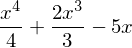

In [133]:
integrate(f)

順便畫個圖。

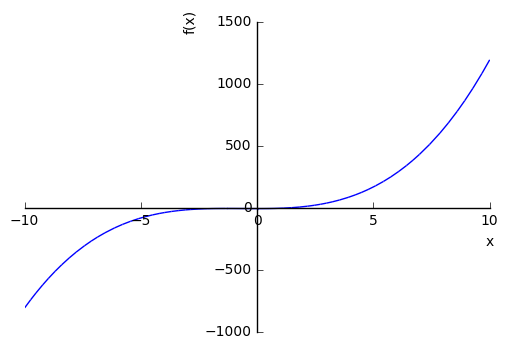

In [82]:
plot(f)

## 10-2 微積分

第二種設變數的方式。

In [134]:
from sympy.abc import a, b, c

#### 微分

和剛剛有點不同, 我們指定變數

In [140]:
f = a*x**2 + b*x + c

In [141]:
diff(f,x)

In [18]:
diff(sin(x), x)

In [19]:
diff(ln(x), x)

#### 積分

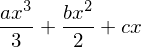

In [21]:
integrate(f,x)

設範圍

In [25]:
integrate(1/x, (x, 1, 3))

In [26]:
integrate(exp(x),x)

無窮大符號: oo

In [28]:
integrate(exp(-x**2), (x, -oo, oo))

#### 取極限

In [29]:
limit(sin(x)/x, x, 0)

In [31]:
limit(sin(a*x)/x, x, 0)

## 10-3 求解

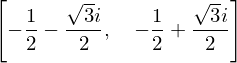

In [32]:
solve(x**2 + x + 1, x)

我們再加一個 y 

In [33]:
y = symbols('y')

聯立方程組假設式子都是等於零。

In [34]:
solve([x - 2*y + 5, x + y -4], [x,y])

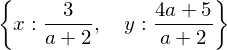

In [35]:
solve([a*x - 2*y + 5, x + y -4], [x,y])

## 10-4 矩陣運算

In [36]:
A = Matrix([[1,2],[3,4]])

In [37]:
B = np.matrix([[1,2],[3,4]])

In [41]:
A[0,1]

In [39]:
B[0,1]

2

In [42]:
A.row(0)

In [43]:
B[0]

matrix([[1, 2]])

In [44]:
A.col(1)

In [45]:
B[:,1]

matrix([[2],
        [4]])

reduced row echelon form 這樣做。第二項資料是 pivot 行。

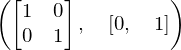

In [46]:
A.rref()

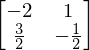

In [47]:
A.inv()

In [53]:
B**(-1)

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

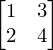

In [54]:
A.transpose()

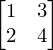

In [55]:
A.T

In [56]:
A.det()

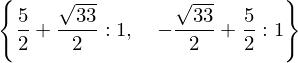

In [57]:
A.eigenvals()

符號也可以的。

In [60]:
v = Matrix([[x,y]]).T

# v = Matrix([[x],[y]])

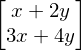

In [62]:
A*v

## 10-5 解微分方程

我們來解 $$y'' + y =0$$ 這個微分方程式。聽說解是長這樣:

$$A \sin(x) + B \cos(x)$$

首先, 我們先來告訴 SymPy, f 是個函數。

In [63]:
f = symbols('f', cls=Function)

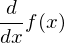

In [64]:
f(x).diff(x)

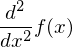

In [65]:
f(x).diff(x,x)

In [66]:
dsolve(f(x).diff(x,x)+f(x), f(x))

## 10-6 代入

In [67]:
eq = (x+1)**2

In [68]:
eq

In [69]:
eq.subs(x, (a+b))

In [70]:
eq.subs(x, 3)

In [71]:
eq.subs(x,pi)

## 10-7 畫圖

之前我們簡單畫過一個圖, 我們再深入研究一點。

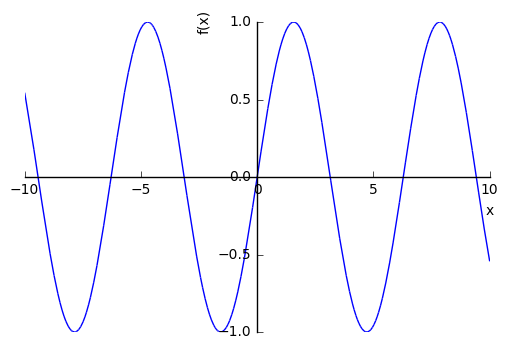

In [88]:
plot(sin(x))

限制範圍。

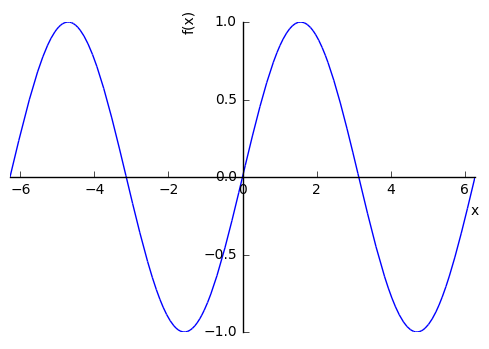

In [90]:
plot(sin(x), (x, -2*pi, 2*pi))

多個函數一起來。

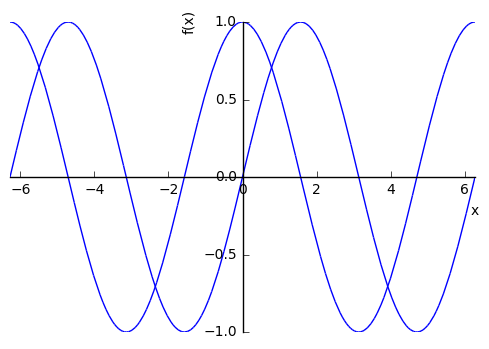

In [99]:
plot(sin(x), cos(x), (x,-2*pi,2*pi))

#### 參數式

In [115]:
from sympy.plotting import plot_parametric

In [116]:
from sympy.abc import t

In [148]:
r = 1 + 0.3*sin(10*t)

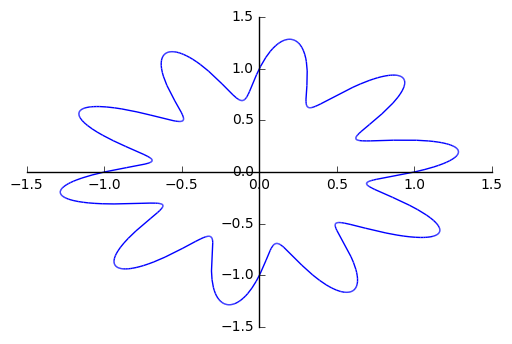

In [149]:
plot_parametric(r*cos(t), r*sin(t), (t,0,2*pi))

#### 隱函數

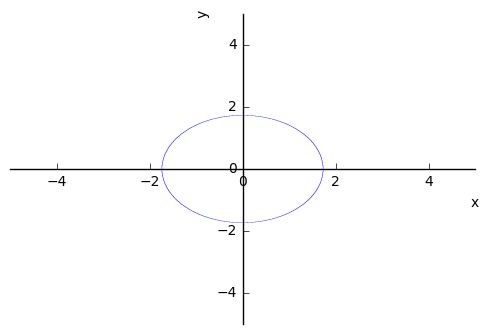

In [125]:
plot_implicit(Eq(x**2+y**2,3))

也可以畫不等式。

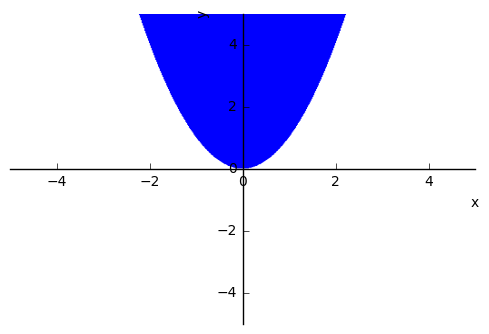

In [150]:
plot_implicit(y>x**2)

## 10-8 [練習] 自動出題系統

In [179]:
from IPython.display import display

In [186]:
def quiz():
    c1 = np.random.randint(1,6)
    c2 = np.random.randint(1,6)
    c3 = np.random.randint(1,6)
    f = c1*x**2 + c2*x + c3
    display(f)
    w = input("按 enter 告訴你答案...")
    g = integrate(f,x)
    display(g)

按 enter 告訴你答案...


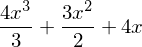

In [187]:
quiz()

In [171]:
f = coef[0]*x**2 + coef[1]*x + coef[2]

## 10-9 [練習] $\pi$ 的密碼



In [200]:
s = str(pi.n(100000))

In [203]:
s.find('1215')

In [205]:
s[11940:11950]

'1712158552'

In [207]:
cutepi = str(pi.n(200))
cutepi.find('822')

## 10-10 希臘符號

數學很喜歡的希臘字母當符號...

In [72]:
delta = symbols('delta')

In [73]:
(delta - 1)**2

比較特別是 lambda, 因為 lambda 是 Python 保留字, 我們只好假裝不會拼 lambda。

In [74]:
lamda = symbols('lamda')p = M.charpoly(lamda)v

In [75]:
M = Matrix([[0,1,0],[2,0,1],[0,-1,0]])

In [76]:
p = M.charpoly(lamda)

In [77]:
factor(p)